In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pylab as plb
import tifffile
import h5py
plb.rcParams['pdf.fonttype'] = 42
segmented_fly = 508
registration_dir = '/media/FlyDataC/FlyDB/Fly%04d/'%(segmented_fly)

Populating the interactive namespace from numpy and matplotlib


/media/analysis-code/flight-muscles/packages/tifffile.py:2170: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
/media/analysis-code/flight-muscles/packages/tifffile.py:2170: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
/media/analysis-code/flight-muscles/packages/tifffile.py:2170: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
#these functions are used for the image overlays.

def overlay_hue_saturation(overlay,bkgnd,
                       gama = 1.0,
                       color_map = plb.cm.jet,
                       alpha = 0.5):
    """overlay a gray-scale background with a colorized image in hsv space"""
    from skimage import data, color, io, img_as_float
    gama_correct = lambda x: x**gama
    if len(np.shape(bkgnd)) == 2:
        img_color = np.dstack((bkgnd, bkgnd, bkgnd))
    else:
        img_color = bkgnd
        
    if len(np.shape(overlay)) == 2:
        overlay_color = color_map(gama_correct(overlay))[:,:,:3]
        mask = overlay>0
    else:
        overlay_color = overlay
        mask = np.sum(overlay.astype(uint64),axis = 2)>0
    img_hsv = color.rgb2hsv(img_color)
    overlay_hsv = color.rgb2hsv(overlay_color)
    img_hsv[..., 0] += mask*overlay_hsv[..., 0] * alpha
    img_hsv[..., 1] += mask*overlay_hsv[..., 1] * alpha
    img_overlay = color.hsv2rgb(img_hsv)
    return(img_overlay)

def colorized_image(input_img,
                    map_point = 0.5,
                    color_map = plb.cm.jet,
                    alpha = 0.2,
                    gama = 1.0,
                    gain = 1.0):
    """colorize an image using a color taken from a color map and a point on the map,
    used to create families of colorized images that live within a similar color-scheme"""
    from skimage import data, color, io, img_as_float
    gama_correct = lambda x: x**gama
    img = gain*input_img
    img = gama_correct(img)
    img[img>255] = 255
    img = img.astype(uint8)
    bg_color = np.dstack((img, img, img))
    
    mask = img>0
    map_img = mask*map_point
    
    overlay_color = color_map(map_img)[:,:,:3]
    img_hsv = color.rgb2hsv(bg_color)
    
    overlay_hsv = color.rgb2hsv(overlay_color)
    #make hue and saturation of img map to color
    img_hsv[..., 0] += mask*overlay_hsv[..., 0] * alpha
    img_hsv[..., 1] += mask*overlay_hsv[..., 1] * alpha
    img_overlay = color.hsv2rgb(img_hsv)
    return(img_overlay)

In [3]:
#load imagesrgb2hsv
#load images
bkgnd_img = tifffile.TiffFile(registration_dir + 'registration/65G06_brightfield_cuticle.tif').asarray()
b1_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_b1.tiff').asarray()
b2_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_b2.tiff').asarray()
b3_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_b3.tiff').asarray()

i1_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_i1.tiff').asarray()
i2_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_i2.tiff').asarray()

iii1_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_iii1.tiff').asarray()
iii3_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_iii3.tiff').asarray()
iii24_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_iii24.tiff').asarray()

hg1_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_hg1.tiff').asarray()
hg2_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_hg2.tiff').asarray()
hg3_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_hg3.tiff').asarray()
hg4_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_hg4.tiff').asarray()

tpd_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_tpd.tiff').asarray()
tpv_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_tpv.tiff').asarray()

pr_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_pr.tiff').asarray()
nm_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_nm.tiff').asarray()

ttm_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_ttm.tiff').asarray()

DVM1_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_DVM1.tiff').asarray()
DVM2_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_DVM2.tiff').asarray()
DVM3_stack = tifffile.TiffFile(registration_dir + 'registration/combined_stack_DVM3.tiff').asarray()

#make max projections
b1_img = np.max(b1_stack,axis = 0)
b2_img = np.max(b2_stack,axis = 0)
b3_img = np.max(b3_stack,axis = 0)

i1_img = np.max(i1_stack,axis = 0)
i2_img = np.max(i2_stack,axis = 0)

iii1_img = np.max(iii1_stack,axis = 0)
iii3_img = np.max(iii3_stack,axis = 0)
iii24_img = np.max(iii24_stack,axis = 0)

hg1_img = np.max(hg1_stack,axis = 0)
hg2_img = np.max(hg2_stack,axis = 0)
hg3_img = np.max(hg3_stack,axis = 0)
hg4_img = np.max(hg4_stack,axis = 0)

tpd_img = np.max(tpd_stack,axis = 0)
tpv_img = np.max(tpv_stack,axis = 0)

pr_img = np.max(pr_stack,axis = 0)
nm_img = np.max(nm_stack,axis = 0)

ttm_img = np.max(ttm_stack,axis = 0)

DVM1_img = np.max(DVM1_stack,axis = 0)
DVM2_img = np.max(DVM2_stack,axis = 0)
DVM3_img = np.max(DVM3_stack,axis = 0)

In [4]:
#import os
#os.remove(registration_dir + 'max_imgs.h5py')

In [5]:
#lvs = locals()
#import h5py
#max_projections = h5py.File(registration_dir + 'max_imgs.h5py')
#for key,stack in lvs.items():
#    if 'img' in key:
#        k = key.split('_')[0]
#        print k
#        max_projections.create_dataset(k,data = stack,compression = 'gzip',compression_opts = 5)
#max_projections.flush()
#max_projections.close()
#del(max_projections)

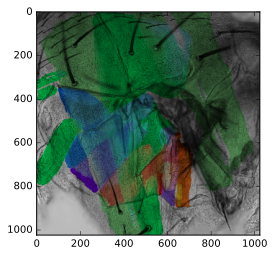

In [6]:
#colorize each max intensity projection

b_map = plb.cm.Blues_r
i_map = plb.cm.Purples_r
iii_map = plb.cm.Reds_r
hg_map = plb.cm.Oranges_r
tp_map = plb.cm.Greens_r
pr_map = plb.cm.Greens_r
nm_map = plb.cm.Greens_r

ttm_map = plb.cm.Greens_r

dvm_map = plb.cm.bone_r

cvls = {'b1':0.01,'b2':0.2,'b3':0.4,
        'i1':0.01,'i2':0.2,
        'iii1':0.01,'iii3':0.2,'iii24':0.4,
        'hg1':0.01,'hg2':0.2,'hg3':0.4,'hg4':0.6,
        'tpd':0.01,'tpv':0.1,
        'pr':0.01,'nm':0.01,
        'ttm':0.01,
        'dvm':0.5}

b1_colorized = colorized_image(b1_img,color_map = b_map,map_point = cvls['b1'],alpha = 1.0)
b2_colorized = colorized_image(b2_img,color_map = b_map,map_point = cvls['b2'],alpha = 1.0)
b3_colorized = colorized_image(b3_img,color_map = b_map,map_point = cvls['b3'],alpha = 1.0,gama = 0.65,gain = 40.0)

i1_colorized = colorized_image(i1_img,color_map = i_map,map_point = cvls['i1'],alpha = 1.0)
i2_colorized = colorized_image(i2_img,color_map = i_map,map_point = cvls['i2'],alpha = 1.0,gama = 0.7,gain = 10.0)

iii1_colorized = colorized_image(iii1_img,color_map = iii_map,map_point = cvls['iii1'],alpha = 1.0)
iii3_colorized = colorized_image(iii3_img,color_map = iii_map,map_point = cvls['iii3'],alpha = 1.0)
iii24_colorized = colorized_image(iii24_img,color_map = iii_map,map_point = cvls['iii24'],alpha = 1.0)

hg1_colorized = colorized_image(hg1_img,color_map = hg_map,map_point = cvls['hg1'],alpha = 1.0,gain = 2.0)
hg2_colorized = colorized_image(hg2_img,color_map = hg_map,map_point = cvls['hg2'],alpha = 1.0)
hg3_colorized = colorized_image(hg3_img,color_map = hg_map,map_point = cvls['hg3'],alpha = 1.0)
hg4_colorized = colorized_image(hg4_img,color_map = hg_map,map_point = cvls['hg4'],alpha = 1.0)

tpd_colorized = colorized_image(tpd_img,color_map = tp_map,map_point = cvls['tpd'],alpha = 1.0)
tpv_colorized = colorized_image(tpv_img,color_map = tp_map,map_point = cvls['tpv'],alpha = 1.0)

pr_colorized = colorized_image(pr_img,color_map = pr_map,map_point = cvls['pr'],alpha = 1.0)
nm_colorized = colorized_image(nm_img,color_map = nm_map,map_point = cvls['nm'],alpha = 1.0)

ttm_colorized = colorized_image(ttm_img,color_map = ttm_map,map_point = cvls['ttm'],alpha = 1.0)

DVM1_colorized = colorized_image(DVM1_img,color_map = ttm_map,map_point = cvls['dvm'],alpha = 1.0)
DVM2_colorized = colorized_image(DVM2_img,color_map = ttm_map,map_point = cvls['dvm'],alpha = 1.0)
DVM3_colorized = colorized_image(DVM3_img,color_map = ttm_map,map_point = cvls['dvm'],alpha = 1.0)



#combine the images using addition
img_sum = (tpd_colorized+
           tpv_colorized+
           b1_colorized+
           b2_colorized+
           b3_colorized+
           i1_colorized+
           i2_colorized+
           iii1_colorized+
           iii3_colorized+
           iii24_colorized+
           hg1_colorized+
           hg2_colorized+
           hg3_colorized+
           hg4_colorized+
           pr_colorized+
           nm_colorized+
           ttm_colorized+
           DVM1_colorized+
           DVM2_colorized+
           DVM3_colorized)*255

img_sum[img_sum>255] = 255
img_sum = img_sum.astype(uint8)
imshow(overlay_hue_saturation(img_sum[:,:,:3],bkgnd_img,alpha = 1.0))
display(gcf());close()

#### The resuling color overlay is a bit of a mess since all the colors get mixed together. To produce an image that is easier to interpret I define function mask_stack that will only combine bits of the image that are within the mask.  I then recursively apply the function 'mask_stack' to a list of colorized muscle stacks to create a visualization of the muscle population. The order of muscles in the list is important since this determines the way the muscles overlap in the final image. The colorized images of the muscles are then mixed into the greyscale image of the cuticle.

In [7]:
def mask_stack(top_img,bottom_img,alpha = 0.5,gain = 15):
    from skimage import data, color, io, img_as_float
    top_hsv = color.rgb2hsv(top_img)
    mask = top_hsv[...,2]/np.max(top_hsv[...,2])
    mask *= gain
    mask[mask>1] = 1
    mask[mask<1] = 0
    mask = np.dstack((mask,mask,mask)) 
    inverse = 1-mask*alpha
    return top_img*mask + bottom_img*inverse


#stacked_muscles = reduce(mask_stack, 
#                          [tpd_colorized,
#                           tpv_colorized,
#                           nm_colorized,
#                           pr_colorized,
#                           b2_colorized,
#                           i1_colorized,
#                           hg4_colorized,
#                           iii24_colorized,
#                           i2_colorized,
#                           hg2_colorized,
#                           hg3_colorized,
#                           iii3_colorized,
#                           iii1_colorized,
#                           b1_colorized,
#                           b3_colorized,
#                           hg1_colorized,
#                           ttm_colorized,
#                           DVM1_colorized,
#                           DVM2_colorized,
#                           DVM3_colorized])

def get_summary_img(muscle_list):
    stacked_muscles = reduce(mask_stack,muscle_list)   
    gama = 1.5
    gama_correct = lambda x: x**gama
    cut_gamma = gama_correct(bkgnd_img)+600
    cuticle = (np.dstack((cut_gamma,cut_gamma,cut_gamma))*0.03).astype(uint8)
    muscles = (stacked_muscles*0.9*255)
    sumimg = cuticle+muscles
    sumimg[sumimg>255] = 255
    sumimg = sumimg.astype(uint8)
    return sumimg
    #imshow(sumimg)
    #display(gcf());close()

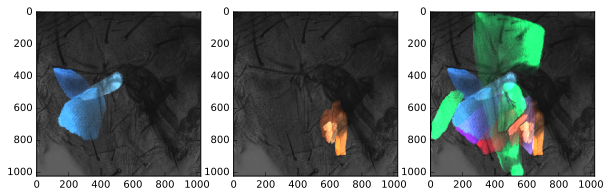

In [8]:
#this creates a bunch of summary images with different sets of muscles displayed.
#first create lists of colorized images that will be combined together using the mask_stak procedure.

figure(figsize = (10,10))
bkgd = []

b_musc = [b2_colorized,b1_colorized,b3_colorized]

i_musc = [i1_colorized,i2_colorized]

iii_musc = [iii1_colorized,iii24_colorized,iii3_colorized]

hg_musc = [hg4_colorized,hg2_colorized, hg3_colorized,hg1_colorized]

t_musc = [tpd_colorized,tpv_colorized, ttm_colorized]

b_i_musc = [b2_colorized,i1_colorized,i2_colorized,b1_colorized,b3_colorized]

b_i_iii_musc = [b2_colorized,i1_colorized,iii24_colorized,
                i2_colorized,iii3_colorized,iii1_colorized,b1_colorized,b3_colorized]

b_i_iii_hg_musc = [b2_colorized,i1_colorized,hg4_colorized,iii24_colorized,i2_colorized,
                   hg2_colorized,hg3_colorized,iii3_colorized,iii1_colorized,b1_colorized,
                   b3_colorized,hg1_colorized]

b_i_iii_hg_tp_musc = [tpd_colorized,tpv_colorized,b2_colorized,
                      i1_colorized,hg4_colorized,iii24_colorized,i2_colorized,pr_colorized,
                      hg2_colorized, hg3_colorized,iii3_colorized,iii1_colorized,
                      b1_colorized,b3_colorized,hg1_colorized,ttm_colorized]

#now combine them together

gamma = 1.5

sumimg = get_summary_img(b_musc)
tifffile.imsave('b_musc.tiff',sumimg)
subplot(1,3,1);imshow(sumimg)

sumimg = get_summary_img(i_musc)
tifffile.imsave('i_musc.tiff',sumimg)

sumimg = get_summary_img(iii_musc)
tifffile.imsave('iii_musc.tiff',sumimg)

sumimg = get_summary_img(hg_musc)
tifffile.imsave('hg_musc.tiff',sumimg)
subplot(1,3,2);imshow(sumimg)

sumimg = get_summary_img(t_musc)
tifffile.imsave('t_musc.tiff',sumimg)

sumimg = get_summary_img(b_i_musc)
tifffile.imsave('b_i_musc.tiff',sumimg)

sumimg = get_summary_img(b_i_iii_musc)
tifffile.imsave('b_i_iii_musc.tiff',sumimg)

sumimg = get_summary_img(b_i_iii_hg_musc)
tifffile.imsave('b_i_iii_hg_musc.tiff',sumimg)

sumimg = get_summary_img(b_i_iii_hg_tp_musc)
tifffile.imsave('b_i_iii_hg_tp_musc.tiff',sumimg)
subplot(1,3,3);imshow(sumimg)

cut_gamma = bkgnd_img**gamma+600
cuticle = (np.dstack((cut_gamma,cut_gamma,cut_gamma))*0.03).astype(uint8)
tifffile.imsave('bkgd.tiff',cuticle)
tifffile.imsave('muscle_viz.tiff',sumimg)

#### To define the regions of interest I find the 2d contours around each muscle. For simplicity I then resample the contours to 20 points.

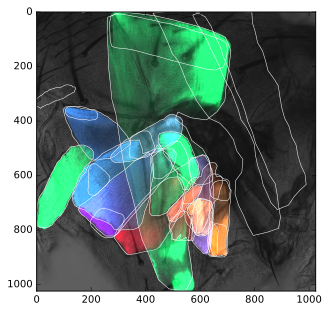

In [9]:
mimgs = {'b1':b1_img,
         'b2':b2_img,
         'b3':b3_img,
         'i1':i1_img,
         'i2':i2_img,
         'iii1':iii1_img,
         'iii3':iii3_img,
         'iii24':iii24_img,
         'hg1':hg1_img,
         'hg2':hg2_img,
         'hg3':hg3_img,
         'hg4':hg4_img,
         'tpv':tpv_img,
         'tpd':tpd_img,
         'pr':pr_img,
         'nm':nm_img,
         'ttm':ttm_img,
         'DVM1':DVM1_img,
         'DVM2':DVM2_img,
         'DVM3':DVM3_img}
import os
#ad_hoc_masks 
for fn in os.listdir(registration_dir  + 'ad_hoc_masks/'):
    mimgs[fn.split('.')[0]] = tifffile.TiffFile(registration_dir + 'ad_hoc_masks/' + fn).asarray()[:,:,1]
model_data = dict()
#construct model
from skimage import measure
from scipy.interpolate import griddata
figure(figsize(5,5))
imshow(sumimg)
for mkey in mimgs.keys():
    img = mimgs[mkey]
    imdim = np.array(shape(img)) + np.array([2,2])
    buff = zeros(imdim)
    buff[1:-1,1:-1] = img
    img = buff
    contours = [measure.find_contours(img,1)[0]]
    for n, contour in enumerate(contours):
        clen = len(contour[:,0])
        x = griddata(np.arange(clen),contour[:,0],np.linspace(clen,20))
        x = x[~isnan(x)]
        x = hstack((x,x[0]))
        x -= 1
        y = griddata(np.arange(clen),contour[:,1],np.linspace(clen,20))
        y = y[~isnan(y)]
        y = hstack((y,y[0]))
        y -= 1
        model_data[mkey] = vstack((y,x))
        plot(y, x,linewidth=0.5,color = 'w')
gca().set_xbound((0,1024))
gca().set_ybound((0,1024))
display(gcf());close()

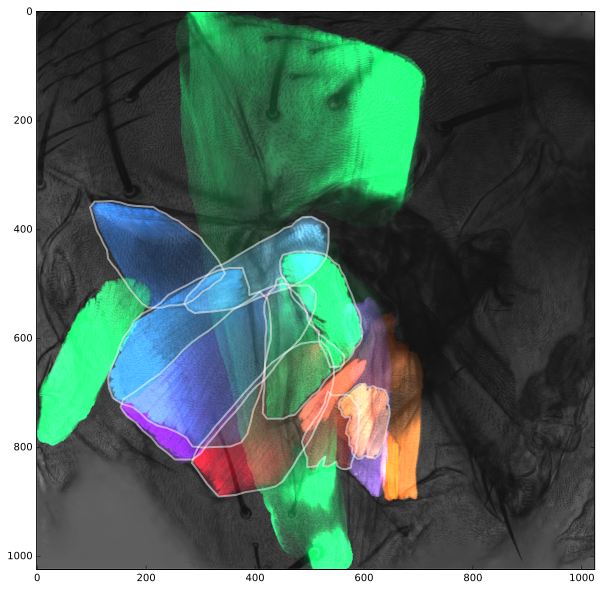

In [10]:
import muscle_model as mm
fig = figure(figsize = (10,10))
imfile = tifffile.TiffFile('muscle_viz.tiff')
sumimg = imfile.asarray()

###add position of large setae 
model_data['e1'] = np.array([[ 170.02788104,  326.71685254],
                             [ 380.98203222,  919.92627014]])
model_data['e2'] = array([[ 172.83333333,  332.83333333],
                          [ 551.5       ,  164.83333333]])
e1 = model_data['e1']
e2 = model_data['e2']
muscles = dict()

for key in model_data.keys():
    if not(key in ['e1','e2']):
        muscles[key] = model_data[key]
        
confocal_frame = mm.Frame()
confocal_frame['a1'] = e2[1]-e2[0]
confocal_frame['a2'] = e1[1]-e2[0]
confocal_frame['p'] = e2[0]

#construct a geometric model object from the muscle contours
thorax = mm.GeometricModel(muscles,confocal_frame)

imshow(sumimg)

#now use the ModelView object to plot the contours on the image
thorax_view = mm.ModelViewMPL(thorax)
contour_kwargs = {'b3':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'b1':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'b2':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'i1':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'iii1':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'tpv':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'tpd':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'iii3':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5},
                  'hg4':{'edgecolor': 'w', 'linewidth': 2.0, 'facecolor': 'none','alpha':0.5}}

thorax_view.plot(thorax.frame,contour_kwargs = contour_kwargs)
gca().axis('tight')
savefig('model_view.pdf')
display(gcf());close()

#### Now I construct a model and plot it in the reference frame of the confocal image: the position of the three bristles that form the reference frame are hard coded in this notebook.

In [12]:
import cPickle as cpkl
f= open('model_data.cpkl','wb')
cpkl.dump(model_data,f)
f.close()

#### The following block will model the view of the muscles in the widfield image streem using the volumetric information in the confocal z-series to approximate image blur using the circle of confusion.

In [11]:
obj_mag = 10.0 #10x objective
tube_fl = 200.0 #mm tube lens focal length
obj_fl = tube_fl/obj_mag #mm objective focal length
obj_NA = 0.45 #objective NA
obj_entrance_pupil = 2*obj_fl*obj_NA
voxel_ptch = (0.76/1000.0,0.76/1000.0,2.98/1000.0) #mm
fslice = 25 #focal slice - the slice in the confocal stack that is at the center of focus point in the reconstructed model 
working_distance = 4.0 #mm, not used in the calculation
wavelength = 530.0/(1000*1000) #mm
#airy_disk = 2*(0.61*wavelength)/obj_NA
airy_disk = wavelength/(2*obj_NA) #diffraction limit
#The airy disk should be around the confocal-image voxel pitch 
#depending on the NA of the objectve used to collect the confocal stack 
airy_disk = airy_disk*10 #the model seems to do much better fort the actual
#focal slice than what we collect - possibly due to motion

def make_kernel(diam):
    """construct a circular convolution kernel """
    diam_pix = diam/voxel_ptch[0]
    x,y = meshgrid(range(-512,512),range(-512,512))
    kernel = ((sqrt(x**2+y**2)>diam_pix).astype(float)-1)*-1
    return kernel

def get_cof_diam(slice_idx):
    """calculate the diameter of the circle of confusion"""
    slice_delta = (slice_idx-fslice+0.5)*voxel_ptch[2]
    #just add the airy disk to the blur circle so the slice that is in focus is blurred
    #by the diffraction limit. Though this should be a more complicated kernal than a circle
    #it has a small effect since most of the blurring comes from out of focus light, not diffraction.
    return obj_entrance_pupil*abs(slice_delta)/obj_fl + airy_disk  

def blur_slice(img,idx):
    """blur a slice"""
    img = (img>0).astype(float)
    from scipy.signal import fftconvolve 
    cof_diam = get_cof_diam(idx)
    kernel = make_kernel(cof_diam)
    img_out = fftconvolve(img,kernel,mode = 'same')
    return img_out*float(sum(img))/float(sum(img_out))

In [12]:
airy_disk

0.005888888888888889

In [13]:
for stack,key in [(b1_stack,'b1'),(b2_stack,'b2'),(b3_stack,'b3'),(i1_stack,'i1')]:
    #stack = b3_stack
    blur_model = [blur_slice(stack[idx],idx) for idx in range(shape(stack)[0])]
    blur_model = np.array(blur_model)
    blur_model[isnan(blur_model)] = 0

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide


In [16]:
stack_dict = {'b1':b1_stack,
            'b2':b2_stack,
            'b3':b3_stack,
            'i1':i1_stack,
            'i2':i2_stack,
            'iii1':iii1_stack,
            'iii3':iii3_stack,
            'iii24':iii24_stack,
            'hg1':hg1_stack,
            'hg2':hg2_stack,
            'hg3':hg3_stack,
            'hg4':hg4_stack,
            'tpd':tpd_stack,
            'tpv':tpv_stack,
            'pr':pr_stack,
            'nm':nm_stack,
            'ttm':ttm_stack,
            'DVM1':DVM1_stack,
            'DVM2':DVM2_stack,
            'DVM3':DVM3_stack}
model_dict = dict()
for key,stack in stack_dict.items():
    print key
    model = [blur_slice(stack[idx],idx) for idx in range(shape(stack)[0])]
    model = np.array(model)
    model[isnan(model)] = 0
    model_dict[key] = model

pr
tpd
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide


In [17]:
tmp_img = sum(model_dict['pr'],axis = 0)
for key in ['tpd','nm','tpv','i1','i2','iii1','iii24','iii3','hg1','hg2','hg3','hg4','b1','b2','b3','ttm']:
    tmp_img += sum(model_dict[key],axis = 0)

In [22]:
import h5py
import os

In [25]:
os.remove(registration_dir + 'volumetric_model.hdf5')
model_file = h5py.File(registration_dir + 'volumetric_model.hdf5','a')

In [26]:
for key,stack in model_dict.items():
    model_file.create_dataset(key, data = stack,compression="gzip", compression_opts=5)

In [27]:
os.remove(registration_dir + 'flatened_model.hdf5')
flattened_file = h5py.File(registration_dir + 'flatened_model.hdf5','a')
for key,stack in model_dict.items():
    flattened_file.create_dataset(key,data = np.sum(stack,axis = 0),compression = 'gzip',compression_opts = 5)

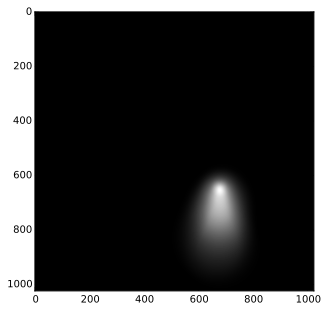

In [40]:
imshow(flattened_file['hg3'],cmap = cm.gray)

In [41]:
model_file.flush()
model_file.close()

In [42]:
flattened_file.flush()
flattened_file.close()